# Rainfall Classification using KNN Algorithm 

In [1]:
"""
@author: Manoj Roy, ID: 20216039"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#read data
df=pd.read_csv('G3_DATA.csv')
df.head()

,ID,TEM,DPT,WIS,HUM,SLP,RAN
0,1,17.0,11.2,1.56,72.15,1015.4,NRT
1,2,21.4,11.8,1.62,64.79,1012.6,NRT
2,3,23.6,15.3,2.80,66.99,1010.7,LTR
3,4,29.3,18.6,3.70,62.68,1006.9,NRT
4,5,29.1,23.4,5.22,75.39,1003.2,LTR


In [3]:
#predict class 
Y=df['RAN']

In [4]:
#removing unnecessary columns
del df['ID']
del df['RAN']

In [5]:
#feauture class 
X=df
X.head()

,TEM,DPT,WIS,HUM,SLP
0,17.0,11.2,1.56,72.15,1015.4
1,21.4,11.8,1.62,64.79,1012.6
2,23.6,15.3,2.80,66.99,1010.7
3,29.3,18.6,3.70,62.68,1006.9
4,29.1,23.4,5.22,75.39,1003.2


In [6]:
#splitting the dataset 
#assuming initial k value to be 15
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=216039)
KNN=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
KNN.fit(X_train, Y_train)
P=KNN.predict(X_test)
P

array(['MHR', 'MHR', 'LTR', 'MHR', 'LTR', 'LTR', 'NRT', 'LTR', 'LTR',
       'NRT', 'NRT', 'LTR', 'MHR', 'NRT', 'NRT', 'LTR', 'LTR', 'LTR',
       'NRT', 'NRT', 'LTR', 'LTR', 'MHR', 'LTR', 'MHR', 'LTR', 'MHR',
       'NRT', 'NRT', 'MHR', 'LTR', 'NRT', 'MHR', 'MHR', 'LTR', 'MHR',
       'LTR', 'NRT', 'LTR', 'NRT', 'MHR', 'NRT', 'NRT', 'LTR', 'NRT',
       'NRT', 'LTR', 'LTR', 'LTR', 'NRT', 'NRT', 'LTR', 'LTR', 'MHR',
       'NRT', 'LTR', 'MHR', 'MHR', 'NRT', 'LTR', 'LTR', 'NRT', 'MHR',
       'MHR', 'LTR', 'MHR', 'LTR', 'MHR', 'LTR', 'LTR', 'NRT', 'MHR',
       'NRT', 'MHR', 'MHR', 'NRT', 'LTR', 'LTR', 'LTR', 'LTR', 'NRT',
       'LTR', 'LTR', 'LTR', 'LTR', 'MHR', 'LTR', 'LTR', 'NRT', 'MHR',
       'LTR', 'LTR', 'LTR', 'MHR', 'LTR', 'LTR', 'NRT', 'NRT', 'LTR',
       'NRT', 'MHR', 'LTR', 'LTR', 'MHR', 'NRT', 'NRT', 'NRT', 'LTR',
       'NRT', 'MHR', 'MHR', 'LTR', 'LTR', 'NRT', 'LTR', 'NRT', 'MHR',
       'LTR', 'NRT', 'NRT', 'LTR', 'NRT', 'NRT', 'NRT', 'MHR', 'MHR',
       'MHR', 'NRT',

In [7]:
accuracy_score(Y_test, P)

0.7797619047619048

In [8]:
# Optimal Value of k and Accuracy Rate for Optimal k

error = []
accuracy = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    accuracy.append(np.mean(pred_i == Y_test))
print(error)
print(accuracy)

[0.24404761904761904, 0.2619047619047619, 0.22023809523809523, 0.22023809523809523, 0.20238095238095238, 0.20833333333333334, 0.21428571428571427, 0.21428571428571427, 0.23214285714285715, 0.22023809523809523, 0.20238095238095238, 0.20238095238095238, 0.21428571428571427, 0.19642857142857142, 0.20238095238095238, 0.20238095238095238, 0.21428571428571427, 0.20238095238095238, 0.21428571428571427, 0.22023809523809523, 0.21428571428571427, 0.22023809523809523, 0.21428571428571427, 0.23214285714285715, 0.22023809523809523, 0.21428571428571427, 0.20833333333333334, 0.22023809523809523, 0.22023809523809523, 0.23214285714285715, 0.23214285714285715, 0.23809523809523808, 0.23809523809523808, 0.23214285714285715, 0.23809523809523808, 0.23214285714285715, 0.24404761904761904, 0.23809523809523808, 0.23214285714285715]
[0.7559523809523809, 0.7380952380952381, 0.7797619047619048, 0.7797619047619048, 0.7976190476190477, 0.7916666666666666, 0.7857142857142857, 0.7857142857142857, 0.7678571428571429, 

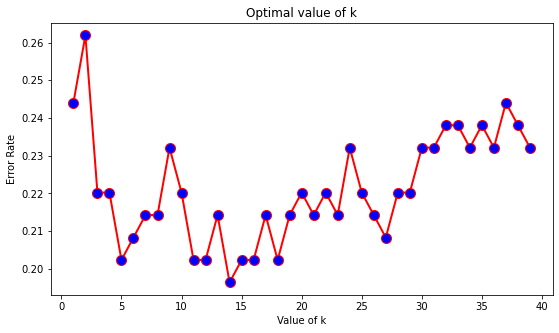

In [9]:
#plotting the optimal value of k vs Error Rate
plt.figure(figsize=(9, 5))
plt.plot(range(1, 40), error, color='red', linestyle='solid', marker='o',
         linewidth =2, markerfacecolor='blue', markersize=10)
plt.title('Optimal value of k')
plt.xlabel('Value of k')
plt.ylabel('Error Rate')
plt.savefig('ErrorRate.jpg',dpi=1200)

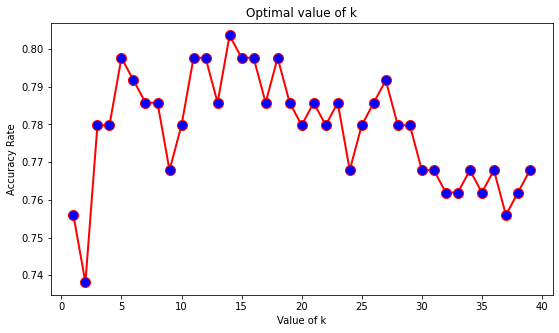

In [10]:
#plotting the optimal value of k vs Accuracy Rate
plt.figure(figsize=(9, 5))
plt.plot(range(1, 40), accuracy, color='red', linestyle='solid', marker='o',
         linewidth =2, markerfacecolor='blue', markersize=10)
plt.title('Optimal value of k')
plt.xlabel('Value of k')
plt.ylabel('Accuracy Rate')
plt.savefig('AccuracyRate.jpg',dpi=1200)

In [11]:
#training the model using optimal k value found from the graph 
KNN1=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
KNN1.fit(X_train, Y_train)
P1=KNN1.predict(X_test)
P1

array(['MHR', 'MHR', 'NRT', 'MHR', 'NRT', 'LTR', 'NRT', 'LTR', 'LTR',
       'NRT', 'NRT', 'NRT', 'MHR', 'NRT', 'LTR', 'LTR', 'MHR', 'LTR',
       'NRT', 'NRT', 'NRT', 'LTR', 'MHR', 'LTR', 'MHR', 'LTR', 'MHR',
       'LTR', 'NRT', 'LTR', 'MHR', 'NRT', 'MHR', 'MHR', 'LTR', 'MHR',
       'LTR', 'NRT', 'LTR', 'NRT', 'MHR', 'NRT', 'NRT', 'LTR', 'NRT',
       'NRT', 'LTR', 'LTR', 'LTR', 'NRT', 'NRT', 'LTR', 'LTR', 'MHR',
       'NRT', 'LTR', 'MHR', 'MHR', 'NRT', 'LTR', 'LTR', 'NRT', 'MHR',
       'MHR', 'LTR', 'LTR', 'LTR', 'MHR', 'MHR', 'LTR', 'NRT', 'MHR',
       'NRT', 'MHR', 'MHR', 'NRT', 'LTR', 'NRT', 'MHR', 'LTR', 'NRT',
       'LTR', 'LTR', 'LTR', 'LTR', 'MHR', 'LTR', 'LTR', 'NRT', 'MHR',
       'LTR', 'LTR', 'LTR', 'MHR', 'NRT', 'LTR', 'NRT', 'NRT', 'NRT',
       'NRT', 'MHR', 'NRT', 'LTR', 'MHR', 'NRT', 'NRT', 'NRT', 'LTR',
       'NRT', 'MHR', 'MHR', 'NRT', 'MHR', 'NRT', 'LTR', 'NRT', 'MHR',
       'LTR', 'NRT', 'NRT', 'LTR', 'NRT', 'NRT', 'NRT', 'MHR', 'MHR',
       'MHR', 'NRT',

In [12]:
accuracy_score(Y_test, P1)

0.7857142857142857

In [13]:
print(confusion_matrix(Y_test, P1))

[[45 13  8]
 [ 9 39  0]
 [ 6  0 48]]


In [14]:
print(classification_report(Y_test, P1))

              precision    recall  f1-score   support

         LTR       0.75      0.68      0.71        66
         MHR       0.75      0.81      0.78        48
         NRT       0.86      0.89      0.87        54

    accuracy                           0.79       168
   macro avg       0.79      0.79      0.79       168
weighted avg       0.78      0.79      0.78       168

